# Linear Regression
* many implementations of OLS in various Python libraries: NumPy, SciPy, statsmodels, scikit-learn
* 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [6]:
housing = pd.read_csv('/Users/julioberrocal/Desktop/Classes/Winter 2024/Advanced Programming/OIM7502_SP24/data/Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2


In [8]:
housing['price'].describe().round(2)

count         545.00
mean      4766729.25
std       1870439.62
min       1750000.00
25%       3430000.00
50%       4340000.00
75%       5740000.00
max      13300000.00
Name: price, dtype: float64

In [10]:
housing.describe().round(2)

,price,area,bedrooms,bathrooms,stories
count,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81
std,1870439.62,2170.14,0.74,0.50,0.87
min,1750000.00,1650.00,1.00,1.00,1.00
25%,3430000.00,3600.00,2.00,1.00,1.00
50%,4340000.00,4600.00,3.00,1.00,2.00
75%,5740000.00,6360.00,3.00,2.00,2.00
max,13300000.00,16200.00,6.00,4.00,4.00


In [11]:
housing.corr()

,price,area,bedrooms,bathrooms,stories
price,1.000000,0.535997,0.366494,0.517545,0.420712
area,0.535997,1.000000,0.151858,0.193820,0.083996
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165
stories,0.420712,0.083996,0.408564,0.326165,1.000000


In [12]:
data = housing.copy()

In [13]:
data['price'] = data['price'] / 1000

In [14]:
data.corr()

,price,area,bedrooms,bathrooms,stories
price,1.000000,0.535997,0.366494,0.517545,0.420712
area,0.535997,1.000000,0.151858,0.193820,0.083996
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165
stories,0.420712,0.083996,0.408564,0.326165,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      545 non-null    float64
 1   area       545 non-null    int64  
 2   bedrooms   545 non-null    int64  
 3   bathrooms  545 non-null    int64  
 4   stories    545 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 21.4 KB


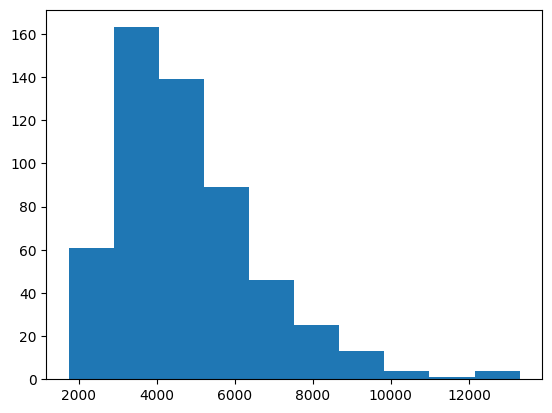

In [17]:
plt.hist(data['price']);

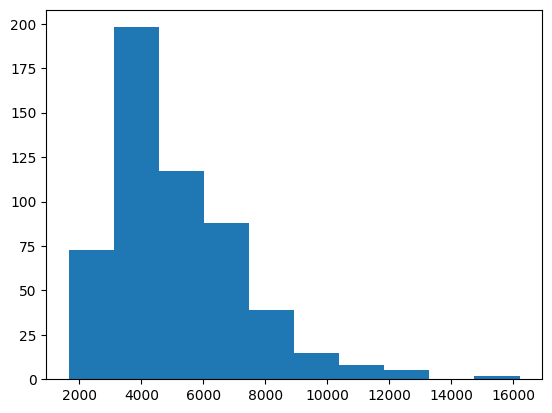

In [18]:
plt.hist(data['area']);

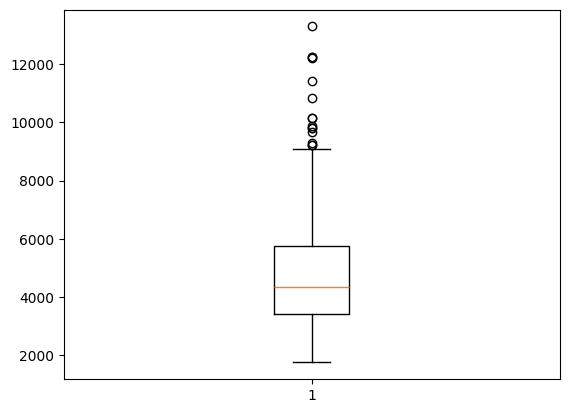

In [21]:
plt.boxplot(data['price']);

In [26]:
data_9 = data[data['price'] < 8.5e3]

In [27]:
data_9.describe()

,price,area,bedrooms,bathrooms,stories
count,519.000000,519.000000,519.000000,519.000000,519.000000
mean,4511.775414,5030.944123,2.936416,1.250482,1.784200
std,1489.800087,2075.212615,0.733771,0.459640,0.863045
min,1750.000000,1650.000000,1.000000,1.000000,1.000000
25%,3409.000000,3520.000000,2.000000,1.000000,1.000000
50%,4235.000000,4500.000000,3.000000,1.000000,2.000000
75%,5526.500000,6155.000000,3.000000,1.000000,2.000000
max,8463.000000,15600.000000,6.000000,3.000000,4.000000


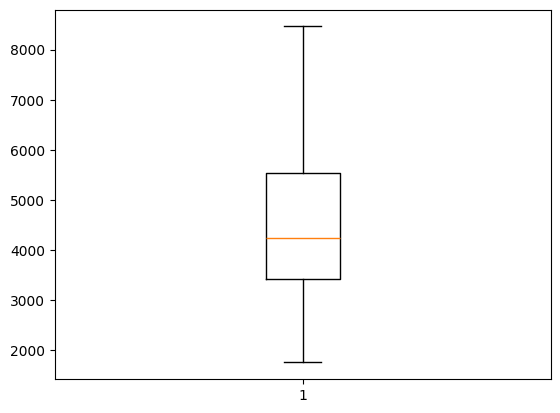

In [28]:
plt.boxplot(data_9['price']);

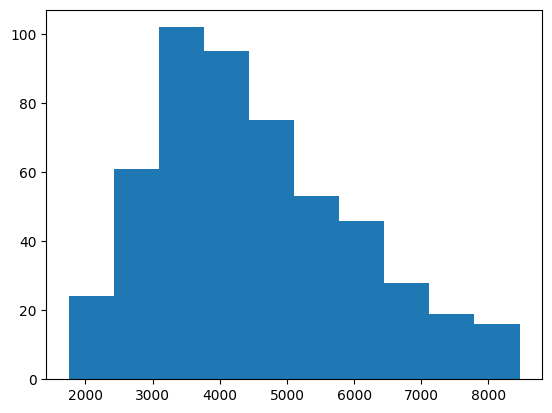

In [30]:
plt.hist(data_9['price']);

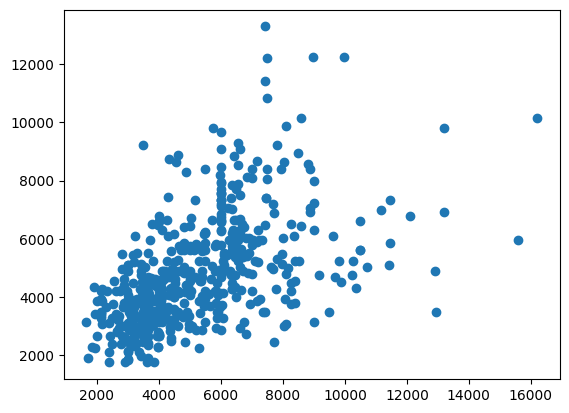

In [31]:
plt.scatter(data['area'],data['price']);

In [32]:
y = data['price']
x = data['area']
x = sm.add_constant(x)

x.head()

,const,area
0,1.0,7420
1,1.0,8960
2,1.0,9960
3,1.0,7500
4,1.0,7420


In [34]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           7.39e-42
Time:                        16:17:21   Log-Likelihood:                -4786.5
No. Observations:                 545   AIC:                             9577.
Df Residuals:                     543   BIC:                             9586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2387.3085    174.498     13.681      0.000    2044.535    2730.082
area           0.4620      0.031     14.795      0.000       0.401       0.523
==============================================================================
Omnibus:                       92.668   Durbin-Watson:                   0.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.673
Skew:                           0.954   Prob(JB):                     1.31e-40
Kurtosis:                       5.108   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
np.sqrt(((y - model.predict(x)) ** 2).mean())

1577.6125627607867

In [36]:
model.predict(x)

0      5815.162198
1      6526.603535
2      6988.578429
3      5852.120189
4      5815.162198
          ...     
540    3773.233165
541    3496.048229
542    4059.657600
543    3731.655425
544    4165.911825
Length: 545, dtype: float64

In [37]:
data['price']

0      13300.00
1      12250.00
2      12250.00
3      12215.00
4      11410.00
         ...   
540     1820.00
541     1767.15
542     1750.00
543     1750.00
544     1750.00
Name: price, Length: 545, dtype: float64

In [39]:
y = housing['price']
x = housing[['area', 'bedrooms', 'bathrooms', 'stories']]
x = sm.add_constant(x)


In [40]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     155.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.68e-88
Time:                        16:29:54   Log-Likelihood:                -8434.5
No. Observations:                 545   AIC:                         1.688e+04
Df Residuals:                     540   BIC:                         1.690e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.821e+05   2.52e+05     -1.118      0.264   -7.78e+05    2.14e+05
area         380.0244     25.864     14.693      0.000     329.219     430.830
bedrooms    1.983e+05   8.51e+04      2.330      0.020    3.11e+04    3.65e+05
bathrooms     1.2e+06   1.22e+05      9.871      0.000    9.61e+05    1.44e+06
stories     5.316e+05   7.08e+04      7.511      0.000    3.93e+05    6.71e+05
==============================================================================
Omnibus:                       94.932   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.104
Skew:                           0.895   Prob(JB):                     3.97e-51
Kurtosis:                       5.649   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### sklearn

In [45]:
#%pip install scikit-learn

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
reg = linear_model.LinearRegression()

In [119]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler